In [1]:
from sklearn.linear_model import SGDClassifier, SGDRegressor
import sys
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

/usr/lib64/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Read the dataset from the CSV file

In [2]:
import pandas

df = pandas.read_csv('../datasets/bike-sharing-dataset/day.csv')

## Select only one feature ('temp') for X

In [3]:
# X = df[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum']]
X = df[['temp']]
y = df['cnt']
print(X.head())
print(y.head())

       temp
0  0.344167
1  0.363478
2  0.196364
3  0.200000
4  0.226957
0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64


## Put the class values into 2 bins, to create 2 classes...

In [4]:
labels = ["0", "1"]
y_categorical = pandas.cut(y, 2, labels=labels)
print(y_categorical.head())

0    0
1    0
2    0
3    0
4    0
Name: cnt, dtype: category
Categories (2, object): [0 < 1]


## Get the loss for each epoch

Scikit-learn does not offer a way to get the loss for each epoch, but it is printed in stdout. So replace stdout with a new stream, that holds the output in a string, which we will process later to get the loss for each epoch...

In [5]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

We will use only a single instance, to avoid the sum over all instances:

In [6]:
n = 1 ;# number of instances to keep
fX = X[:n].values
fy = y_categorical[:n].values

We are not going to use the linear regression package, we are going to use the stochastic gradient descent with suitable options, to get linear regression...

Learning rate is the parameter `eta0`, which we keep `constant`.

In [7]:
learning_rate = 2


sgd  = SGDClassifier(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)
sgd2 = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)

As we need to calculate also $y-\hat{y}$, we have put `max_iter=1` to do only one step, and we will simulate the epochs with our loop, using `partial_fit()`, which does not re-initialise coefficients $\overrightarrow{w}$, and proceeds with the current ones (stored in the model).

In [8]:
p_sum  = [] ;# this holds the sum of y-y_hat, for all instances (ok, we have only one instance)
p2_sum = []
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model  = sgd.partial_fit(fX, fy, classes=labels)
    model2 = sgd2.partial_fit(fX, fy, classes=labels)
    #print(model.coef_)
    y  = model.predict(fX)
    p  = model.decision_function(fX)
    c  = (1 - np.mean(y == fy))
    p_sum.append(p)
    y2 = model2.predict(fX)
    p2 = model2.decision_function(fX)
    c2 = (1 - np.mean(y2 == fy))
    p2_sum.append(p2)
    #p = model.predict_proba(fX)
    #print(y, y2, fy, c, c2, p, p2)
    #p_sum.append(np.sum(fy-y))
    

Restore the original stdout, and collect the loss from the prints in array `loss_list`:

In [9]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
#print(loss_history)
loss_list  = []
loss2_list = []
use_first = True
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    if use_first:
        loss_list.append(float(line.split("loss: ")[-1]))
    else:
        loss2_list.append(float(line.split("loss: ")[-1]))
    use_first = not use_first

Print the model coefficients:

In [10]:
print(model.coef_)
print(model2.coef_)

[[-7.77531449]]
[[-1.09013377]]


## Print the loss function over epochs...

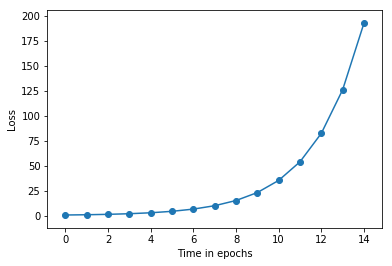

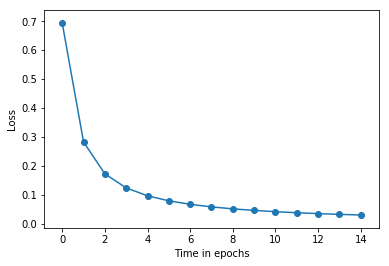

In [11]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(np.arange(len(loss2_list)), loss2_list)
plt.scatter(np.arange(len(loss2_list)), loss2_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

## Print loss with respect to $y-\hat{y}$

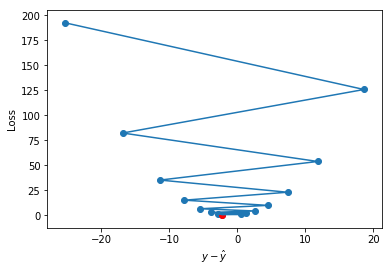

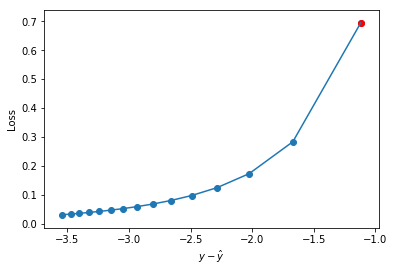

In [12]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(p2_sum, loss2_list)
plt.scatter(p2_sum, loss2_list)
plt.scatter(p2_sum[:1], loss2_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()

The red dot is the starting point...